In [1]:
import pickle
import numpy as np

from mlmodel.benchmark_io import save_mapf_benchmark

import time
import glob
import pickle
import numpy as np
import pandas as pd
from pandarallel import pandarallel
# from tqdm import tqdm

from ifloat.usecase.area_evaluator import SplittingGridEvaluator, WholeGridEvaluator, IAreaEvaluator
from ifloat.util.dependency import Dependency
from ifloat.infra.visualizer import visualize_floor, visualize_grid_and_sg

injector = Dependency()
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [2]:
with open("../data_set/layout_set/9layout_4/layout_set.pkl", "rb") as f:
    _, area, routes = pickle.load(f)



with open("../data_set/training/randam/9map_4/facilities_test_0.pkl","rb")as f:
    facility_test_1=pickle.load(f)
    
with open("../data_set/training/randam/9map_4/facilities_test_1.pkl","rb")as f:
    facility_test_2=pickle.load(f)


In [3]:
for i in range(50):
    with open(f"../data_set/training/randam/9map_4/facilities_test_{i}.pkl","rb")as f:
        facility_test_i=pickle.load(f)
    if i == 0:
        facility_test=facility_test_i
    else:
        facility_test=facility_test+facility_test_i
print(len(facility_test))

with open("../data_set/training/randam/9map_4/all_facility.pkl","wb") as f:
    pickle.dump(facility_test,f)

50000


In [4]:
def make_dataset(area,facility,routes):#マップデータのうちマップ、スタート、ゴールを別々に格納する
    evaluator = injector.resolve(WholeGridEvaluator)

    map_only_data=[]
    starts_data=[]
    goals_data=[]
    
    for i in range(len(facility)) :
        
        m, starts, goals = evaluator.create_grid(area, facility[i], routes)
        
        map_only_data.append(m)
        starts_data.append(starts)
        goals_data.append(goals)

        # visualize_grid_and_sg(m, starts, goals, size_inch=5.0)
        
    return map_only_data,starts_data,goals_data

In [11]:
only_map_data,starts,goals=make_dataset(area,facility_test,routes)

In [6]:
with open("../data_set/training/randam/9map_4/original_map.pkl","wb") as f:
    pickle.dump(only_map_data,f)

In [7]:
# with open("../data_set/training/72bit_cost_only_m.pkl", "rb") as f:
#     only_map_data = pickle.load(f)
    
only_map_data=np.array(only_map_data)
print(only_map_data.shape)

(50000, 18, 18)


In [ ]:
# with open("../data_set/training/randam/9map_472bit_cost_only_m.pkl","rb") as f:
#     only_map_data=pickle.load(f)

In [8]:
map_lr=[]
s_lr=[]
g_lr=[]
map_ud=[]
s_ud=[]
g_ud=[]
map_lr_ud=[]
s_lr_ud=[]
g_lr_ud=[]

map_all=[]
s_all=[]
g_all=[]
number,height, width = only_map_data.shape

for i in range(len(only_map_data)):
    

    map_data = np.array(only_map_data[i])
    start=starts[i]
    goal=goals[i]

# 左右反転
    flipped_lr = np.flip(map_data, axis=1)
    start_lr = [(x, height - 1 - y) for x, y in start]
    goal_lr = [(x, height - 1 - y) for x, y in goal]
# 上下反転
    flipped_ud = np.flip(map_data, axis=0)
    
    start_ud = [(width - 1 - x, y) for x, y in start]
    goal_ud = [(width - 1 - x, y) for x, y in goal]
# 左右上下反転（180度回転に相当）
    flipped_lr_ud = np.flip(flipped_lr, axis=0)
    start_lr_ud = [(width - 1 - x, height - 1 - y) for x, y in start]
    goal_lr_ud = [(width - 1 - x, height - 1 - y) for x, y in goal]

    map_lr.append(flipped_lr)
    map_ud.append(flipped_ud)
    map_lr_ud.append(flipped_lr_ud)
    
    s_lr.append(start_lr)
    g_lr.append(goal_lr)
    
    s_ud.append(start_ud)
    g_ud.append(goal_ud)
    s_lr_ud.append(start_lr_ud)
    g_lr_ud.append(goal_lr_ud)
    
    s_all.append(start)
    s_all.append(start_lr)
    s_all.append(start_ud)
    s_all.append(start_lr_ud)
    
    g_all.append(goal)
    g_all.append(goal_lr)
    g_all.append(goal_ud)
    g_all.append(goal_lr_ud)
    
    map_all.append(map_data)
    map_all.append(flipped_lr)
    map_all.append(flipped_ud)
    map_all.append(flipped_lr_ud)

with open("../data_set/training/randam/9map_4/original_map.pkl","wb") as f:
    pickle.dump(only_map_data,f)
    
with open("../data_set/training/randam/9map_4/flip_lr_map.pkl","wb") as f:
    pickle.dump(map_lr,f)
    
with open("../data_set/training/randam/9map_4/flip_ud_map.pkl","wb") as f:
    pickle.dump(map_ud,f)
    
with open("../data_set/training/randam/9map_4/flip_lr_ud_map.pkl","wb") as f:
    pickle.dump(map_lr_ud,f)
    
with open("../data_set/training/randam/9map_4/all_map.pkl","wb") as f:
    pickle.dump(map_all,f)
    
with open("../data_set/training/randam/9map_4/original_start.pkl","wb") as f:
    pickle.dump(starts,f)
    
with open("../data_set/training/randam/9map_4/flip_lr_start.pkl","wb") as f:
    pickle.dump(s_lr,f)
    
with open("../data_set/training/randam/9map_4/flip_ud_start.pkl","wb") as f:
    pickle.dump(s_ud,f)
    
with open("../data_set/training/randam/9map_4/flip_lr_ud_start.pkl","wb") as f:
    pickle.dump(s_lr_ud,f)
    
with open("../data_set/training/randam/9map_4/all_start.pkl","wb") as f:
    pickle.dump(s_all,f)

with open("../data_set/training/randam/9map_4/original_goal.pkl","wb") as f:
    pickle.dump(goals,f)
    
with open("../data_set/training/randam/9map_4/flip_lr_goal.pkl","wb") as f:
    pickle.dump(g_lr,f)
    
with open("../data_set/training/randam/9map_4/flip_ud_goal.pkl","wb") as f:
    pickle.dump(g_ud,f)
    
with open("../data_set/training/randam/9map_4/flip_lr_ud_goal.pkl","wb") as f:
    pickle.dump(g_lr_ud,f)
    
with open("../data_set/training/randam/9map_4/all_goal.pkl","wb") as f:
    pickle.dump(g_all,f)

In [5]:
for i in range(3):
    with open(f"../data_set/test/9map/facilities_test_{i}.pkl.pkl","rb")as f:
        facility_test_i=pickle.load(f)
    if i == 0:
        facility_test=facility_test_i
    else:
        facility_test=facility_test+facility_test_i
print(len(facility_test))

with open("../data_set/test/9map/all_facility.pkl","wb") as f:
    pickle.dump(facility_test,f)

3000


In [9]:
# with open("../data_set/test/9map/72bit_cost_only_m.pkl", "rb") as f:
#     only_map_data = pickle.load(f)
# only_map_data=np.array(only_map_data)

In [12]:
# with open("../data_set/test/9map/facilities_test_0.pkl","rb")as f:
#     facility_test=pickle.load(f)
    
    
only_map_data,starts,goals=make_dataset(area,facility_test,routes)

only_map_data=np.array(only_map_data)

In [13]:
print(len(starts[0]))

2


In [15]:

map_lr=[]
s_lr=[]
g_lr=[]
map_ud=[]
s_ud=[]
g_ud=[]
map_lr_ud=[]
s_lr_ud=[]
g_lr_ud=[]

map_all=[]
s_all=[]
g_all=[]
number,height, width = only_map_data.shape

for i in range(len(only_map_data)):
    

    map_data = np.array(only_map_data[i])
    start=starts[i]
    goal=goals[i]

# 左右反転
    flipped_lr = np.flip(map_data, axis=1)
    start_lr = [(x, height - 1 - y) for x, y in start]
    goal_lr = [(x, height - 1 - y) for x, y in goal]
# 上下反転
    flipped_ud = np.flip(map_data, axis=0)
    
    start_ud = [(width - 1 - x, y) for x, y in start]
    goal_ud = [(width - 1 - x, y) for x, y in goal]
# 左右上下反転（180度回転に相当）
    flipped_lr_ud = np.flip(flipped_lr, axis=0)
    start_lr_ud = [(width - 1 - x, height - 1 - y) for x, y in start]
    goal_lr_ud = [(width - 1 - x, height - 1 - y) for x, y in goal]

    map_lr.append(flipped_lr)
    map_ud.append(flipped_ud)
    map_lr_ud.append(flipped_lr_ud)
    
    s_lr.append(start_lr)
    g_lr.append(goal_lr)
    
    s_ud.append(start_ud)
    g_ud.append(goal_ud)
    s_lr_ud.append(start_lr_ud)
    g_lr_ud.append(goal_lr_ud)
    
    s_all.append(start)
    s_all.append(start_lr)
    s_all.append(start_ud)
    s_all.append(start_lr_ud)
    
    g_all.append(goal)
    g_all.append(goal_lr)
    g_all.append(goal_ud)
    g_all.append(goal_lr_ud)
    
    map_all.append(map_data)
    map_all.append(flipped_lr)
    map_all.append(flipped_ud)
    map_all.append(flipped_lr_ud)

with open("../data_set/test/randam/9map_2/original_map.pkl","wb") as f:
    pickle.dump(only_map_data,f)
    
with open("../data_set/test/randam/9map_2/flip_lr_map.pkl","wb") as f:
    pickle.dump(map_lr,f)
    
with open("../data_set/test/randam/9map_2/flip_ud_map.pkl","wb") as f:
    pickle.dump(map_ud,f)
    
with open("../data_set/test/randam/9map_2/flip_lr_ud_map.pkl","wb") as f:
    pickle.dump(map_lr_ud,f)
    
with open("../data_set/test/randam/9map_2/all_map.pkl","wb") as f:
    pickle.dump(map_all,f)
    
with open("../data_set/test/randam/9map_2/original_start.pkl","wb") as f:
    pickle.dump(starts,f)
    
with open("../data_set/test/randam/9map_2/flip_lr_start.pkl","wb") as f:
    pickle.dump(s_lr,f)
    
with open("../data_set/test/randam/9map_2/flip_ud_start.pkl","wb") as f:
    pickle.dump(s_ud,f)
    
with open("../data_set/test/randam/9map_2/flip_lr_ud_start.pkl","wb") as f:
    pickle.dump(s_lr_ud,f)
    
with open("../data_set/test/randam/9map_2/all_start.pkl","wb") as f:
    pickle.dump(s_all,f)

with open("../data_set/test/randam/9map_2/original_goal.pkl","wb") as f:
    pickle.dump(goals,f)
    
with open("../data_set/test/randam/9map_2/flip_lr_goal.pkl","wb") as f:
    pickle.dump(g_lr,f)
    
with open("../data_set/test/randam/9map_2/flip_ud_goal.pkl","wb") as f:
    pickle.dump(g_ud,f)
    
with open("../data_set/test/randam/9map_2/flip_lr_ud_goal.pkl","wb") as f:
    pickle.dump(g_lr_ud,f)
    
with open("../data_set/test/randam/9map_2/all_goal.pkl","wb") as f:
    pickle.dump(g_all,f)

(18, 18)
[(3, 16), (3, 13), (14, 17), (2, 6)]


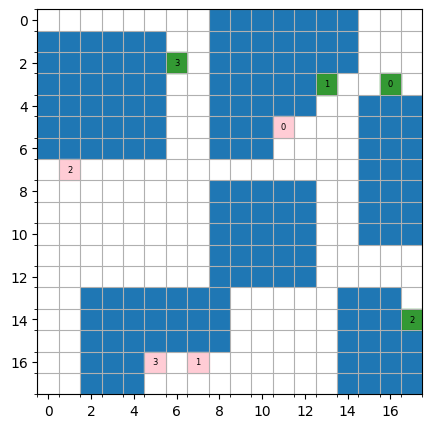

In [12]:
n=9
m=np.array(only_map_data[n])
print(m.shape)
start=starts[n]
goal=goals[n]
    
print(start)    
visualize_grid_and_sg(m, start, goal, size_inch=5.0)